In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = {
    'review': [
        'I love this product, it is amazing!',
        'Terrible experience. Will not buy again.',
        'Okay, but not great.',
        'Absolutely wonderful! Highly recommend.',
        'Worst thing I ever bought.',
        'It works well and I’m satisfied.',
        'Completely useless. Waste of money.',
        'Great value for the price.',
        'Bad quality and poor service.',
        'Excellent product. Five stars!'
    ],
    'sentiment': [1, 0, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df.head()


,review,sentiment
0,"I love this product, it is amazing!",1
1,Terrible experience. Will not buy again.,0
2,"Okay, but not great.",0
3,Absolutely wonderful! Highly recommend.,1
4,Worst thing I ever bought.,0


In [3]:
import re
import string

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df['cleaned_review'] = df['review'].astype(str).apply(preprocess_text)
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,"I love this product, it is amazing!",i love this product it is amazing
1,Terrible experience. Will not buy again.,terrible experience will not buy again
2,"Okay, but not great.",okay but not great
3,Absolutely wonderful! Highly recommend.,absolutely wonderful highly recommend
4,Worst thing I ever bought.,worst thing i ever bought


In [4]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

[[0 2]
 [0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



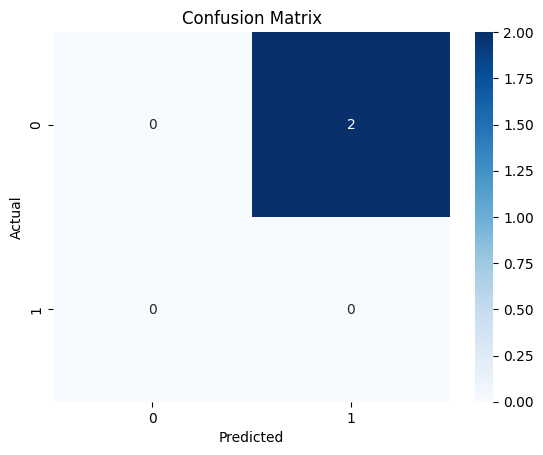

In [7]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
